<a href="https://colab.research.google.com/github/RazanHL/shAI_task/blob/main/task8_Diamond_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Data Importing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
df.describe().style.background_gradient(cmap='pink',axis=None)

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.shape

(43152, 11)

**Checking for null values: there is no null values**


In [ ]:
missing_count = df.isnull().sum()
missing_count

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
missing_count = test_data.isnull().sum()
missing_count

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

**Cheking for unique values**

In [ ]:
#cheking for unique values in every column so we can study the trends and make visualization
df.nunique()

Id         43152
carat        266
cut            5
color          7
clarity        8
depth        179
table        121
price      10640
x            546
y            543
z            368
dtype: int64

**Checking for duplicates: there is no duplicates**

In [ ]:
#Check for duplicate rows
df.duplicated().sum()

0

**Checking for the categories and the unkwon values**

In [ ]:
df['color'].unique()

array(['I', 'G', 'F', 'H', 'D', 'E', 'J'], dtype=object)

In [ ]:
df['clarity'].unique()


array(['SI2', 'VVS2', 'VS2', 'IF', 'VS1', 'SI1', 'VVS1', 'I1'],
      dtype=object)

In [ ]:
df['cut'].unique()


array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

# **Data Visualization**

**General overview**

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

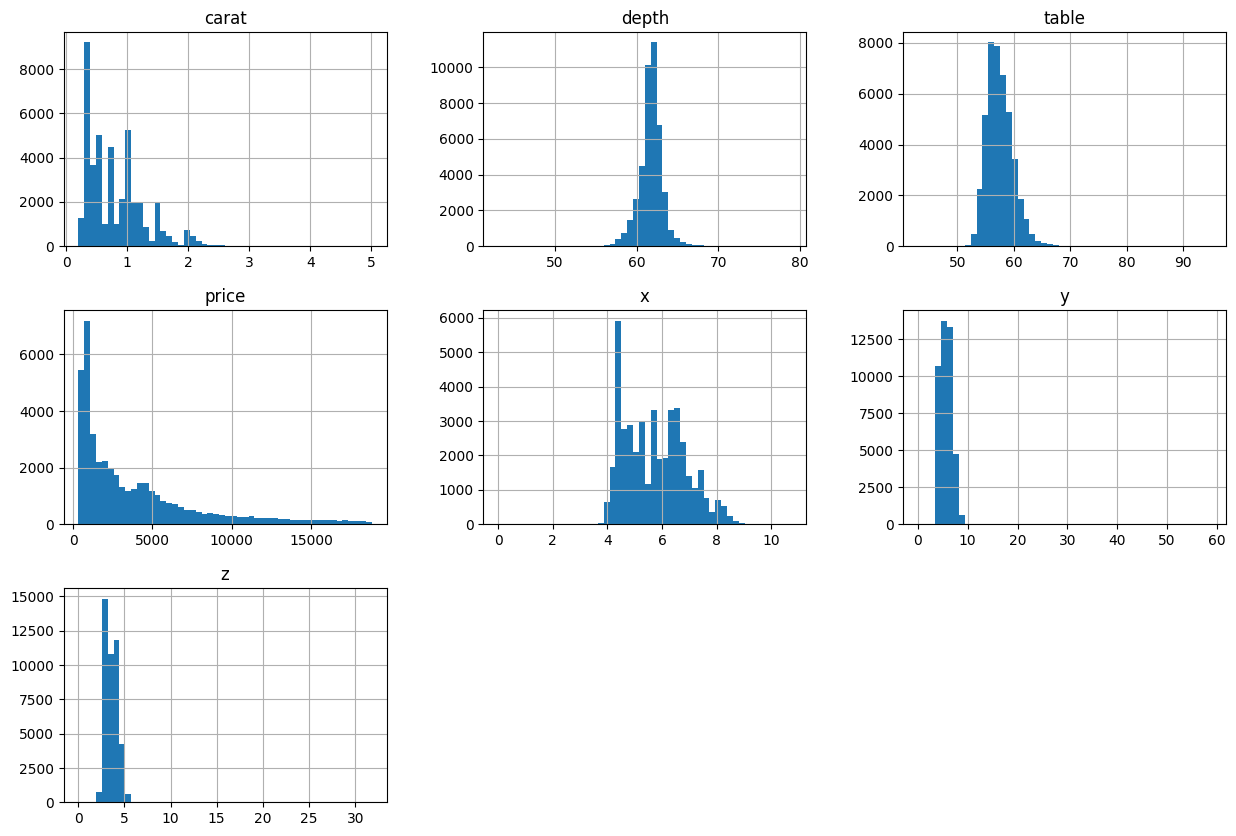

In [ ]:
df.drop('Id', axis=1).hist(figsize=(15,10), bins=50)

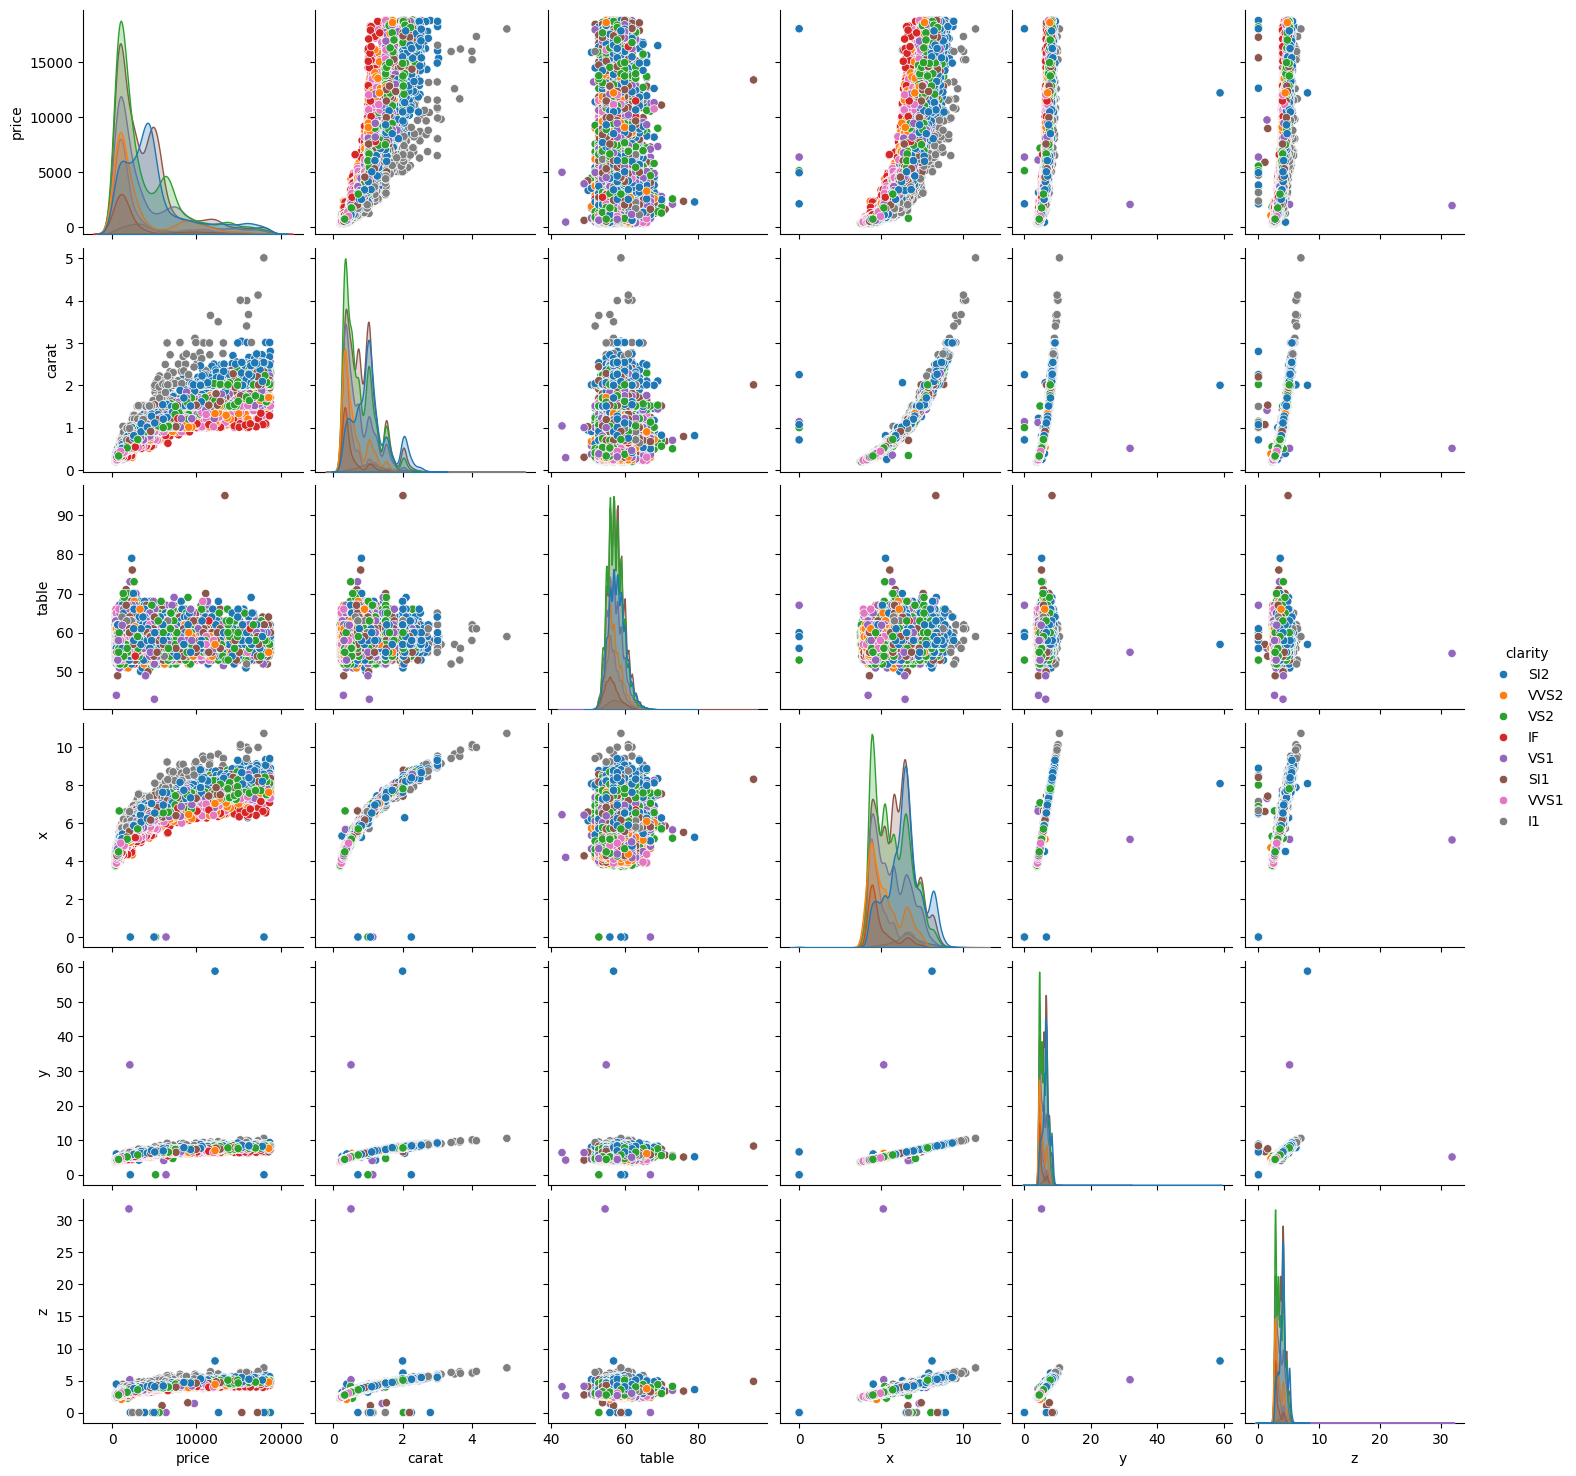

In [ ]:
attributes = ["price" ,"carat", "table", "x", "y", "z", "cut"]
sns.pairplot(data=df[attributes], hue="cut")

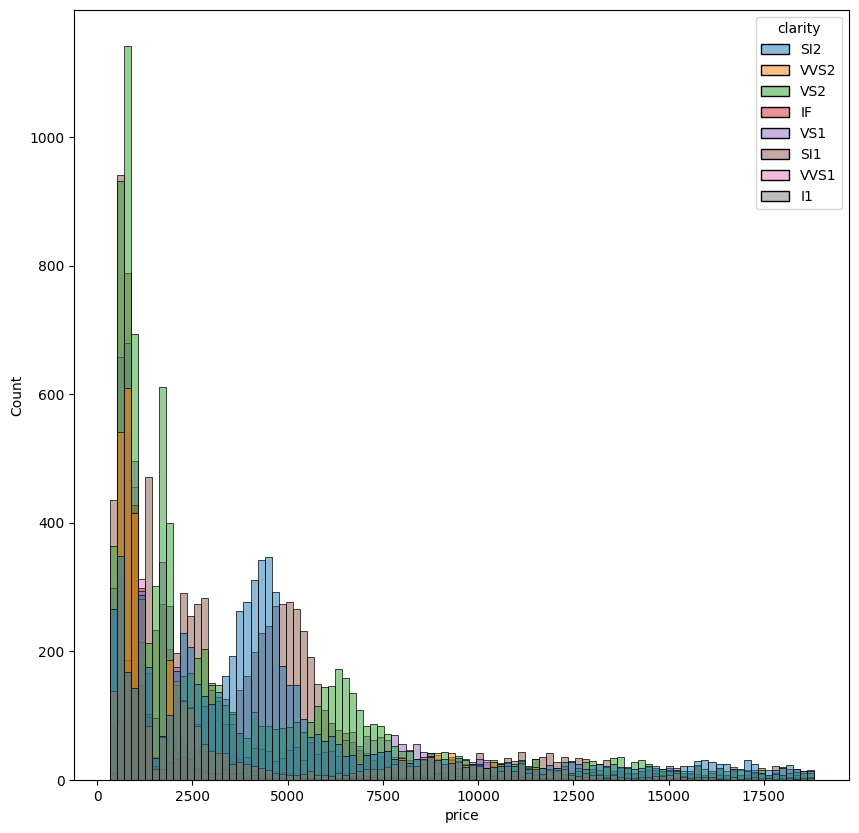

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.histplot(data=df, x='price', hue='clarity', label='Diamond Price', bins=100)

<Axes: >

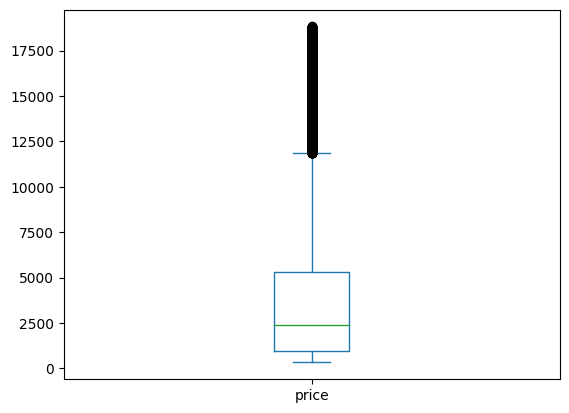

In [ ]:
df['price'].plot(kind='box')

**Categorical columns visualization**

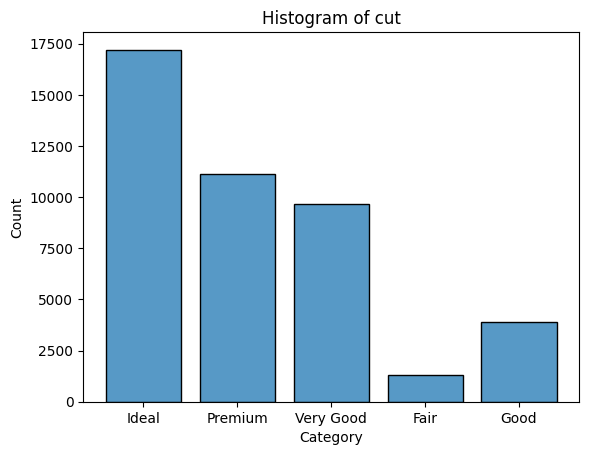

In [ ]:
sns.histplot(data=df, x='cut', shrink=0.8)
plt.title('Histogram of cut')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

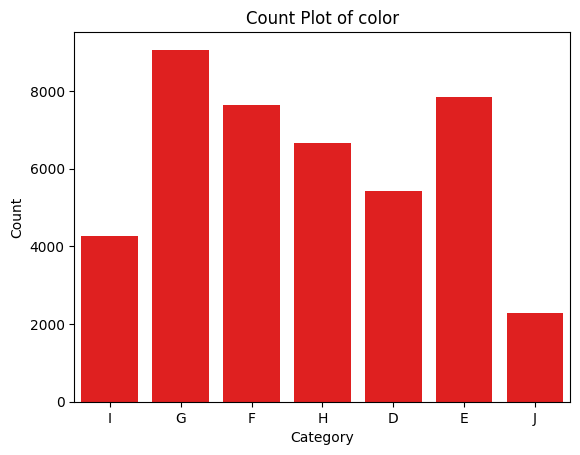

In [ ]:
sns.countplot(data=df, x='color' ,  color='red')
plt.title('Count Plot of color')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

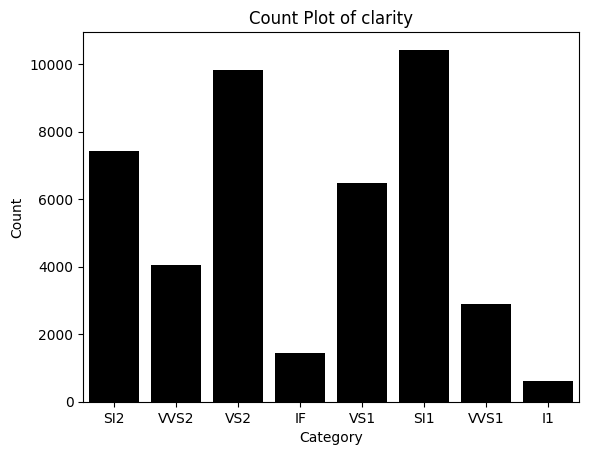

In [ ]:
sns.countplot(data=df, x='clarity',  color='black')
plt.title('Count Plot of clarity')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()



**Dealing with outliers**

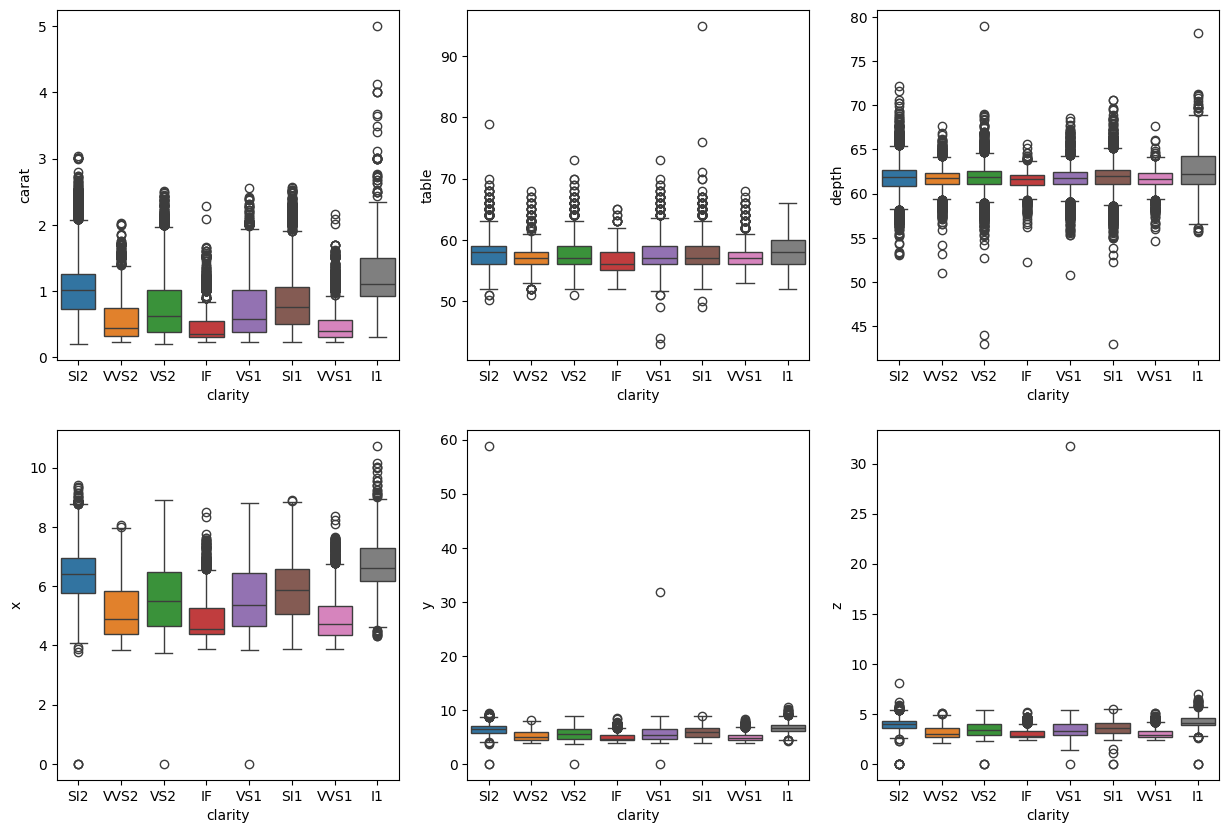

In [ ]:
# Outliers overview based on boxplot, according to clarity categories.
fig = plt.figure(figsize=(15,10))
sub1 = fig.add_subplot(2,3,1)
sub1 = sns.boxplot(x=df.clarity, y=df.carat, hue=df.clarity)

sub1 = fig.add_subplot(2,3,2)
sub1 = sns.boxplot(x=df.clarity, y=df.table, hue=df.clarity)

sub1 = fig.add_subplot(2,3,3)
sub1 = sns.boxplot(x=df.clarity, y=df.depth, hue=df.clarity)

sub2 = fig.add_subplot(2,3,4)
sub2 = sns.boxplot(x=df.clarity, y=df.x, hue=df.clarity)

sub3 = fig.add_subplot(2,3,5)
sub3 = sns.boxplot(x=df.clarity, y=df.y, hue=df.clarity)

sub4 = fig.add_subplot(2,3,6)
sub4 = sns.boxplot(x=df.clarity, y=df.z, hue=df.clarity)

**Z-score method**

In [ ]:
# Calculating the upper limit and the lower limit in every numerical column to detect the outliers.
# first in "carat"
upper_limit = df['carat'].mean() + 3 * df['carat'].std()
lower_limit  = df['carat'].mean()  - 3 * df['carat'].std()
print('upper_limit is: ', upper_limit)
print('lowe_limit is: ',lower_limit)

upper_limit is:  2.218635891857435
lowe_limit is:  -0.6229258436557294


In [ ]:
# the same for other columns:
upper_depth = df['depth'].mean() + 3 * df['depth'].std()
lower_depth  = df['depth'].mean()  - 3 * df['depth'].std()
print('upper_depth is: ', upper_depth)
print('lowe_depth is: ',lower_depth, '\n')

upper_table = df['table'].mean() + 3 * df['table'].std()
lower_table  = df['table'].mean()  - 3 * df['table'].std()
print('upper_table is: ', upper_table)
print('lowe_table is: ',lower_table, '\n')

upper_X = df['x'].mean() + 3 * df['x'].std()
lower_x = df['x'].mean()  - 3 * df['x'].std()
print('upper_x is: ', upper_X)
print('lowe_x is: ',lower_x, '\n')

upper_y = df['y'].mean() + 3 * df['y'].std()
lower_y = df['y'].mean()  - 3 * df['y'].std()
print('upper_y is: ', upper_y)
print('lowe_y is: ',lower_y, '\n')

upper_z = df['z'].mean() + 3 * df['z'].std()
lower_z = df['z'].mean()  - 3 * df['z'].std()
print('upper_z is: ', upper_z)
print('lowe_z is: ',lower_z, '\n')

upper_depth is:  66.05353904280265
lowe_depth is:  57.440815795907014 

upper_table is:  64.1600587621826
lowe_table is:  50.756635713160385 

upper_x is:  9.095404822963776
lowe_x is:  2.3677310687677777 

upper_y is:  9.181443559517515
lowe_y is:  2.2885916648058062 

upper_z is:  5.663280925657569
lowe_z is:  1.413854317204871 



In [ ]:
# Removing outliers:
newdf = df.loc[(df['carat'] < upper_limit) & (df['carat'] > lower_limit)]
print("the outlier in carat: ",len(df) - len(newdf))

new_len = len(newdf)
newdf = newdf.loc[(newdf['depth'] < upper_depth) & (newdf['depth'] > lower_depth)]
print("the outlier in depth: ", new_len - len(newdf))

new_len = len(newdf)
newdf = newdf.loc[(newdf['table'] < upper_table) & (newdf['table'] > lower_table)]
print("the outlier in table: ", new_len - len(newdf))

new_len = len(newdf)
newdf = newdf.loc[(newdf['x'] < upper_X) & (newdf['x'] > lower_x)]
print("the outlier in x: ", new_len - len(newdf))

new_len = len(newdf)
newdf = newdf.loc[(newdf['y'] < upper_y) & (newdf['y'] > lower_y)]
print("the outlier in y: ", new_len - len(newdf))

new_len = len(newdf)
newdf = newdf.loc[(newdf['z'] < upper_z) & (newdf['z'] > lower_z)]
print("the outlier in z: ", new_len - len(newdf))

the outlier in carat:  346
the outlier in depth:  543
the outlier in table:  204
the outlier in x:  3
the outlier in y:  2
the outlier in z:  14


In [ ]:
outliers_count = len(df) - len(newdf)
outliers_count

1112

In [ ]:
newdf.to_csv('df_k.csv', index=False)

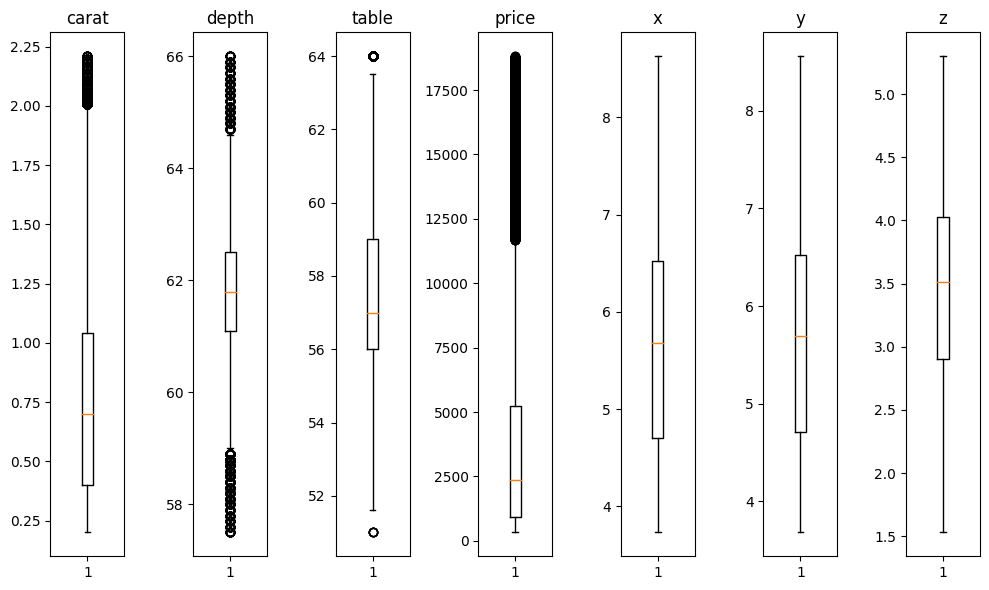

In [ ]:
rows = 1
numeric_columns = newdf.drop('Id',axis=1).select_dtypes(include=['float64', 'int64']).columns
cols = len(numeric_columns)
fig, axes = plt.subplots(rows, cols, figsize=(10, 6))

for i, column in enumerate(numeric_columns):
    ax = axes[i] if cols > 1 else axes  # التعامل مع عدد الأعمدة
    ax.boxplot(newdf[column])
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42040 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       42040 non-null  int64  
 1   carat    42040 non-null  float64
 2   cut      42040 non-null  object 
 3   color    42040 non-null  object 
 4   clarity  42040 non-null  object 
 5   depth    42040 non-null  float64
 6   table    42040 non-null  float64
 7   price    42040 non-null  int64  
 8   x        42040 non-null  float64
 9   y        42040 non-null  float64
 10  z        42040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.8+ MB


# **Correlation check**

**Original data**

In [ ]:
df_cm = df.select_dtypes(['float64', 'int64']).corr()
# correlation_matrix = df.corr(numeric_only=True)
df_cm['price'].sort_values(ascending=False)

price    1.000000
carat    0.921911
x        0.885181
y        0.861354
z        0.857665
table    0.128501
Id      -0.001111
depth   -0.013137
Name: price, dtype: float64

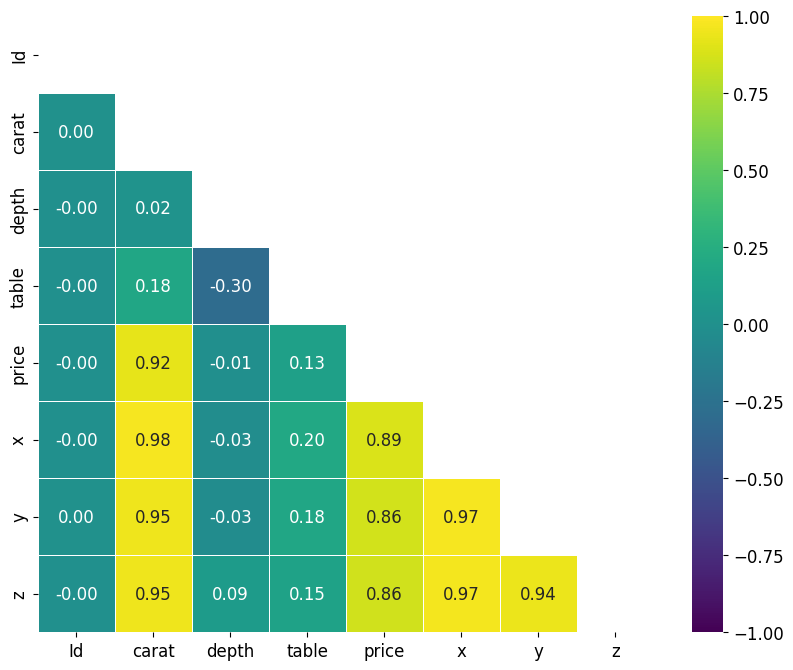

In [ ]:
# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(df_cm, dtype=bool))

plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(df_cm, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.show()

**Cleaned data without outliers (Z-score method)**

In [ ]:
newdf_cm = newdf.select_dtypes(['float64', 'int64']).corr()
newdf_cm['price'].sort_values(ascending=False)

price    1.000000
carat    0.923073
y        0.885971
x        0.884542
z        0.880871
table    0.135105
Id      -0.006359
depth   -0.017288
Name: price, dtype: float64

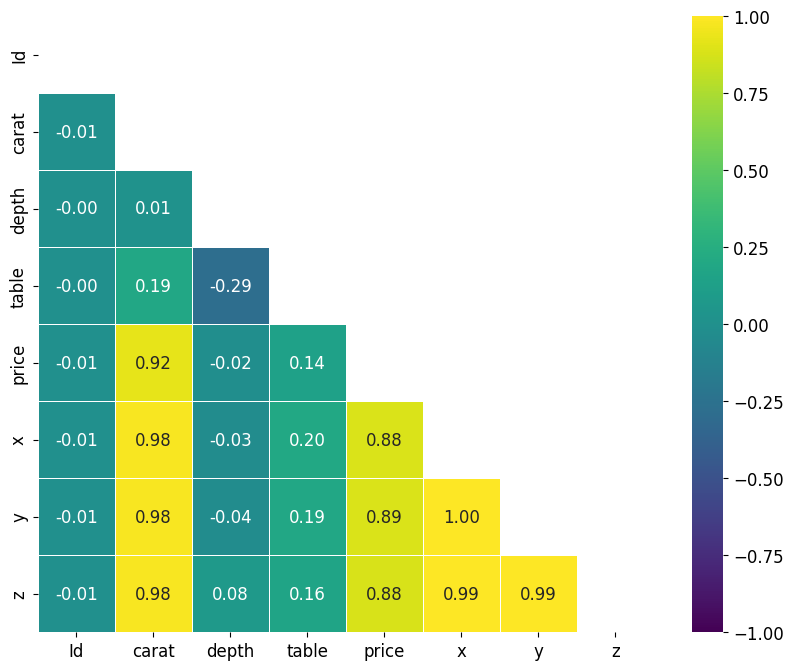

In [ ]:
# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(df_cm, dtype=bool))

plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(newdf_cm, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.show()

# **Feature Engineering**

**Adding size column and removing x,y,z columns**

In [ ]:
newdf['size']=newdf['x']*newdf['y']*newdf['z']

In [ ]:
# checking the correlation between the price column and the rest features,
# the correlation between the size and the price is higher than the other correlations.
newdf_cm = newdf.select_dtypes(['float64', 'int64']).corr()
newdf_cm['price'].sort_values(ascending=False)

price         1.000000
size          0.924465
carat         0.923073
y             0.885971
x             0.884542
z             0.880871
table         0.135105
Unnamed: 0   -0.006359
Id           -0.006359
depth        -0.017288
Name: price, dtype: float64

In [ ]:
# removing x,y,z columns
newdf.drop([ 'x' , 'y' ,'z'], axis=1, inplace=True)

**Splitting the data into train and test**

In [ ]:
# Split data
X1 = newdf.drop(['price', 'Id'], axis=1)
y1 = newdf['price']
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

**Feature transformation**

In [ ]:
lr1_cut = LabelEncoder()
lr1_clarity = LabelEncoder()
x1_train[['cut']] = x1_train[['cut']].apply(lr1_cut.fit_transform)
x1_train[['clarity']] = x1_train[['clarity']].apply(lr1_clarity.fit_transform)
x1_test[['cut']] = x1_test[['cut']].apply(lr1_cut.transform)
x1_test[['clarity']] = x1_test[['clarity']].apply(lr1_clarity.transform)

data_num = x1_train.select_dtypes(np.number).columns
num_attribs = list(data_num)
cat_attribs = ['color']

full_pipeline = ColumnTransformer([
  ("num", StandardScaler(), num_attribs),
  ("cat_non_ord",OneHotEncoder(), cat_attribs),
])

X1_train_prepared = full_pipeline.fit_transform(x1_train)
X1_test_prepared = full_pipeline.transform(x1_test)

In [ ]:
df_col_names = ['carat', 'cut','clarity', 'depth', 'table','size', 'D', 'E', 'F', 'G', 'H', 'I', 'J' ]

X1_train_prepared = pd.DataFrame(X1_train_prepared, columns=df_col_names)
X1_test_prepared = pd.DataFrame(X1_test_prepared, columns=df_col_names)

In [ ]:
X1_train = X1_train_prepared
X1_test = X1_test_prepared

# **Modelling**

## Linear regression models

**LinearRegression**

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X1_train, y1_train)
y_pred = linear_model.predict(X1_test)
train_score = linear_model.score(X1_train, y1_train)
test_score = linear_model.score(X1_test, y1_test)

print('Linear Regression model score using train set is: ', round(train_score, 3))
print('Linear Regression model score using train set is: ',  round(test_score, 3))

Linear Regression model score using train set is:  0.889
Linear Regression model score using train set is:  0.883


In [ ]:
RMSE_linear = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_linear

1319.743351142426

**Ridge**

In [ ]:
ridge_model = Ridge()
ridge_model.fit(X1_train, y1_train)
y_pred = ridge_model.predict(X1_test)
train_score = ridge_model.score(X1_train, y1_train)
test_score = ridge_model.score(X1_test, y1_test)

print('Ridge Regression model score using train set is: ', round(train_score, 3))
print('Ridge Regression model score using train set is: ',  round(test_score, 3))

Ridge Regression model score using train set is:  0.889
Ridge Regression model score using train set is:  0.883


In [ ]:
RMSE_ridge = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_ridge

1319.7467907943385

**Lasso**

In [ ]:
lasso_model = Lasso()
lasso_model.fit(X1_train, y1_train)
y_pred = lasso_model.predict(X1_test)
train_score = lasso_model.score(X1_train, y1_train)
test_score = lasso_model.score(X1_test, y1_test)

print('Lasso Regression model score using train set is: ', round(train_score, 3))
print('Lasso Regression model score using train set is: ',  round(test_score, 3))

Lasso Regression model score using train set is:  0.889
Lasso Regression model score using train set is:  0.883


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.530e+08, tolerance: 5.037e+07
  model = cd_fast.enet_coordinate_descent(


In [ ]:
RMSE_lasso = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_lasso

1320.0369235792882

**LogisticRegression**

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X1_train, y1_train)
y_pred = logistic_model.predict(X1_test)


In [ ]:
train_score = np.exp(-logistic_model.score(X1_train, y1_train))
test_score = np.exp(-logistic_model.score(X1_test, y1_test))

print('LogisticRegression model score using train set is: ', round(train_score, 3))
print('LogisticRegression model score using train set is: ',  round(test_score, 3))

LogisticRegression model score using train set is:  0.967
LogisticRegression model score using train set is:  0.986


In [ ]:
RMSE_logistic = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_logistic

1997.3202746419308

## Decision Tree

In [ ]:
id3 = DecisionTreeRegressor()
id3.fit(X1_train,y1_train)
y_pred = id3.predict(X1_test)
train_score = id3.score(X1_train, y1_train)
test_score = id3.score(X1_test, y1_test)

print('DecisionTree Regression model score using train set is: ', round(train_score, 3))
print('DecisionTree Regression model score using train set is: ',  round(test_score, 3))

DecisionTree Regression model score using train set is:  1.0
DecisionTree Regression model score using train set is:  0.967


In [ ]:
RMSE_id3 = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_id3

698.6503281981774

In [ ]:
feature_importances_id3 = pd.DataFrame(id3.feature_importances_,
                                       index = X1_train.columns,
                                       columns = ['importance']).sort_values('importance', ascending=False)
feature_importances_id3['feature'] = feature_importances_id3.index
feature_importances_id3

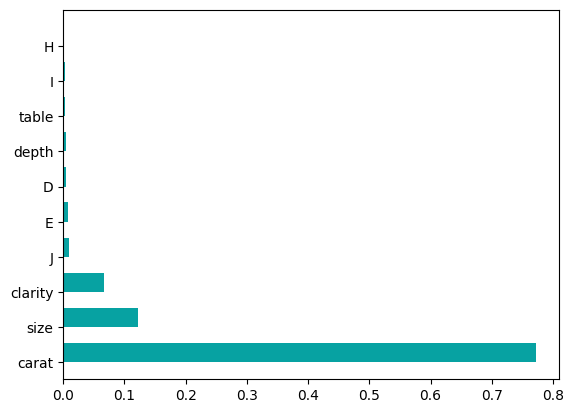

In [ ]:
fig, ax = plt.subplots()

ax.barh(feature_importances_id3.feature[:10],
        feature_importances_id3.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

## Randomforest regression model

In [ ]:
rf1 = RandomForestRegressor()
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)
train_score = rf1.score(X1_train, y1_train)
test_score = rf1.score(X1_test, y1_test)

print('RandomForest Regression model score using train set is: ', round(train_score, 3))
print('RandomForest Regression model score using train set is: ',  round(test_score, 3))

RandomForest Regression model score using train set is:  0.997
RandomForest Regression model score using train set is:  0.981


In [ ]:
RMSE_rf = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_rf

534.8947246259983

In [ ]:
feature_importances_rf = pd.DataFrame(rf.feature_importances_,
                                        index = X1_train.columns,
                                        columns = ['importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importances_rf['feature'] = feature_importances_rf.index

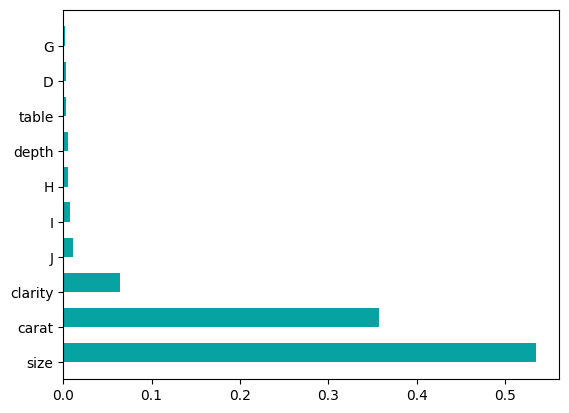

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_rf.feature[:10],
        feature_importances_rf.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

## LightGBM

LightGBM is a gradient boosting framework that uses tree-based learning algorithms. It is designed for efficiency, speed, and performance, making it a popular choice for machine learning tasks.

Here are some key features of LightGBM:

Gradient boosting framework that uses tree-based learning algorithms
Fast and efficient due to its optimized algorithms and data structures
Supports parallel and GPU learning
Handles large datasets with ease
Provides high accuracy and flexibility in model tuning

In [ ]:
lgbm = LGBMRegressor(force_col_wise=True)
lgbm_model = lgbm.fit(X1_train, y1_train)
y_pred = lgbm_model.predict(X1_test)
train_score = lgbm_model.score(X1_train, y1_train)
test_score = lgbm_model.score(X1_test, y1_test)

print('LGBM Regression model score using train set is: ', round(train_score, 3))
print('LGBM Regression model score using train set is: ',  round(test_score, 3))

[LightGBM] [Info] Total Bins 655
[LightGBM] [Info] Number of data points in the train set: 33632, number of used features: 13
[LightGBM] [Info] Start training from score 3838.544095
LGBM Regression model score using train set is:  0.985
LGBM Regression model score using train set is:  0.981


In [ ]:
RMSE_lgbm = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_lgbm

531.5040781506988

In [ ]:
feature_importances_lgbm = pd.DataFrame(lgbm_model.feature_importances_,
                                        index = X1_train.columns,
                                        columns = ['importance']).sort_values('importance', ascending=False)


In [ ]:
feature_importances_lgbm['feature'] = feature_importances_lgbm.index

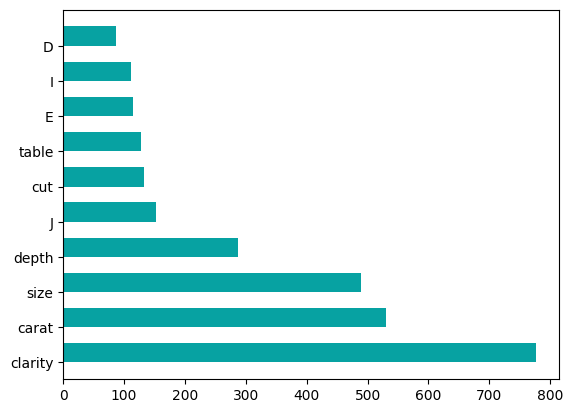

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_lgbm.feature[:10],
        feature_importances_lgbm.importance[:10],
        height=0.55,
        align="edge",
        color="#07a2a2");
plt.show()

## XGBoost  regression model

XGBoost (eXtreme Gradient Boosting) is an open-source machine learning library that provides an efficient and scalable implementation of gradient boosting for classification and regression tasks. It is known for its speed and performance, and is widely used in data science competitions and industry applications.

In [ ]:
xgbm = XGBRegressor()
xgbm.fit(X1_train, y1_train)
y_pred = xgbm.predict(X1_test)
train_score = xgbm.score(X1_train, y1_train)
test_score = xgbm.score(X1_test, y1_test)

print('XGBoost Regression model score using train set is: ', round(train_score, 3))
print('XGBoost Regression model score using train set is: ',  round(test_score, 3))

XGBoost Regression model score using train set is:  0.99
XGBoost Regression model score using train set is:  0.981


In [ ]:
RMSE_xgboost = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_xgboost

528.7547327213815

In [ ]:
feature_importances_xgbm = pd.DataFrame(xgbm.feature_importances_,
                                        index = X1_train.columns,
                                        columns = ['importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importances_xgbm['feature'] = feature_importances_lgbm.index

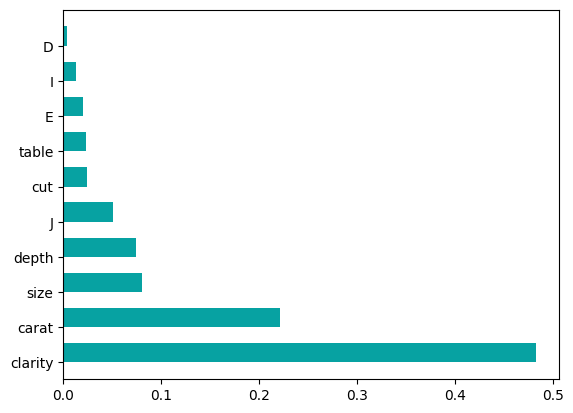

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_xgbm.feature[:10],
        feature_importances_xgbm.importance[:10],
        height=0.55,
        align="edge",
        color="#07a2a2");
plt.show()

## MLP

In [ ]:
mlp_model = MLPRegressor(hidden_layer_sizes=(200, 100), activation='relu', solver='adam', max_iter=500, verbose=True)
mlp_model.fit(X1_train, y1_train)

In [ ]:
mlp_model.score(X1_train, y1_train), mlp_model.score(X1_test, y1_test)

(0.9826258667388961, 0.980488556918196)

In [ ]:
y_pred = mlp_model.predict(X1_test)

In [ ]:
RMSE_mlp = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_mlp

539.0706652466217

# **Evaluation Using Cross-Validation**

**RandomForest**

In [ ]:
scores = cross_val_score(rf, X_train, y_train, scoring ="neg_mean_squared_error",cv = 10)
rf_rmse_scores = np.sqrt(-scores)
rf_rmse_scores

array([534.66122229, 518.78824222, 538.17376348, 575.76413234,
       540.60925556, 526.21698848, 547.88769078, 556.9721835 ,
       543.11514972, 519.20602191])

In [ ]:
print("Scores: ", rf_rmse_scores)
print("Mean: ", rf_rmse_scores.mean())
print("Standard Deviation: ", rf_rmse_scores.std())

Scores:  [534.66122229 518.78824222 538.17376348 575.76413234 540.60925556
 526.21698848 547.88769078 556.9721835  543.11514972 519.20602191]
Mean:  540.1394650281374
Standard Deviation:  16.56309745583089


**LGBM**

In [ ]:
lgbm_scores = cross_val_score(lgbm, X_train, y_train, scoring ="neg_mean_squared_error",cv = 10)
lgbm_rmse_scores = np.sqrt(-lgbm_scores)
lgbm_rmse_scores

In [ ]:
print("Scores: ", lgbm_rmse_scores)
print("Mean: ", lgbm_rmse_scores.mean())
print("Standard Deviation: ", lgbm_rmse_scores.std())

Scores:  [503.75214836 509.54810948 535.34478399 562.82951398 527.92864554
 510.59474809 540.30374362 540.75932918 544.66070147 509.62348855]
Mean:  528.5345212278113
Standard Deviation:  18.506809449666974


**XGBoost**

In [ ]:
xgbm_scores = cross_val_score(xgbm, X_train, y_train, scoring ="neg_mean_squared_error",cv = 10)
xgbm_rmse_scores = np.sqrt(-xgbm_scores)
xgbm_rmse_scores

array([521.56642344, 507.24301766, 550.68265867, 560.23980338,
       521.35963595, 535.49976916, 545.19792576, 538.72292831,
       541.32104799, 505.70274578])

In [ ]:
print("Scores: ", xgbm_rmse_scores)
print("Mean: ", xgbm_rmse_scores.mean())
print("Standard Deviation: ", xgbm_rmse_scores.std())

Scores:  [521.56642344 507.24301766 550.68265867 560.23980338 521.35963595
 535.49976916 545.19792576 538.72292831 541.32104799 505.70274578]
Mean:  532.7535956079824
Standard Deviation:  17.27973702596814


# **Models Parameters Tuning:**

**We will go through parameters fine tuning only with models with the high scores and low RMSE:**
1. RandomForest
2. LGBM
3. XGBoost


**RandomForest**

In [ ]:
parameters = {
    'n_estimators': [200, 400, 600],
    'max_depth': [50, 60, 70],
    'max_features': [5,10,15],
    }
rf = RandomForestRegressor(random_state=42)
rf_rs = RandomizedSearchCV(rf, parameters, scoring = 'neg_mean_squared_error', cv=10)
rf_rs.fit(X1_train, y1_train)
rf_rs.best_params_

{'n_estimators': 400, 'max_features': 10, 'max_depth': 60}

In [ ]:
np.sqrt(-rf_rs.best_score_)

533.6162951493272

In [ ]:
rf_rs.best_estimator_

RandomForestRegressor(max_depth=70, max_features=10, n_estimators=600,
                      random_state=42)

In [ ]:
rf_best = RandomForestRegressor(n_estimators = 200, max_features= 10, max_depth = 50)
rf_best.fit(X_train,y_train)
y_pred = rf_rs.predict(X1_test)
np.sqrt(-rf_rs.score(X1_test, y1_test)), np.sqrt(-rf_rs.score(X1_train, y1_train))

(530.0462578161855, 195.6616188709079)

In [ ]:
RMSE_rf = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_rf

530.0462578161855

In [ ]:
feature_importances_rf= pd.DataFrame(rf_best.feature_importances_,
                                     index = X1_train.columns,
                                     columns = ['importance']).sort_values('importance', ascending=False)


In [ ]:
feature_importances_rf['feature'] = feature_importances_rf.index

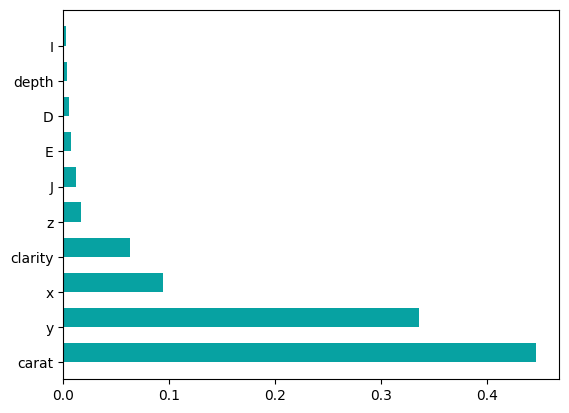

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_rf.feature[:10],
        feature_importances_rf.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

In [ ]:

joblib.dump(rf_best, "randomforest_model.pkl")

['randomforest_model.pkl']

**LGBM**

In [ ]:
parameters = {
    'n_estimators': [200, 250, 300],
    'reg_alpha': [0.1, 0.5, 1],
    'max_depth': [5, 10, 30],
    'boosting_type': ['gbdt', 'rf', 'dart', 'goss']
    }
lgbm = LGBMRegressor()
lgbm_rs = RandomizedSearchCV(lgbm, parameters, scoring = 'neg_mean_squared_error', cv=10)
lgbm_rs.fit(X1_train, y1_train)
lgbm_rs.best_params_

In [ ]:
lgbm_rs.best_params_

{'reg_alpha': 0.1,
 'n_estimators': 250,
 'max_depth': 10,
 'boosting_type': 'gbdt'}

In [ ]:
np.sqrt(-lgbm_rs.best_score_)

522.6786420940707

In [ ]:
lgbm_rs.best_estimator_

LGBMRegressor(n_estimators=250, reg_alpha=0.1)

In [ ]:
lgbm_best = LGBMRegressor(n_estimators = 250, max_features= 6, reg_alpha=0.1)
lgbm_best.fit(X1_train,y1_train)
y_pred = lgbm_best.predict(X1_test)
lgbm_best.score(X1_test, y1_test), lgbm_best.score(X1_train, y1_train)


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1158
[LightGBM] [Info] Number of data points in the train set: 33632, number of used features: 15
[LightGBM] [Info] Start training from score 3838.544095
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


(0.9804735156978907, 0.9896222537545278)

In [ ]:
RMSE_lgbm = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_lgbm

539.2784079172043

In [ ]:
feature_importances_lgbm= pd.DataFrame(lgbm_best.feature_importances_,
                                     index = X1_train.columns,
                                     columns = ['importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importances_lgbm['feature'] = feature_importances_lgbm.index

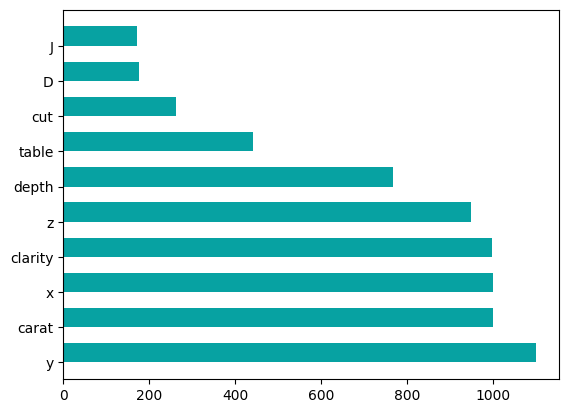

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_lgbm.feature[:10],
        feature_importances_lgbm.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

In [ ]:
joblib.dump(lgbm_best, "lgbm_model.pkl")

['lgbm_model.pkl']

**XGBoost**

In [ ]:
parameters = {
    'n_estimators': [100, 150, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'min_split_loss': [0, 0.1, 0.01],
    'max_depth': [5, 10, 20, 30],
    }
xgbm = XGBRegressor(subsample=0.7)
xgbm_rs = RandomizedSearchCV(xgbm, parameters, scoring = 'r2', cv=10)
xgbm_rs.fit(X1_train, y1_train)
xgbm_rs.best_params_

{'n_estimators': 100,
 'min_split_loss': 0.01,
 'max_depth': 10,
 'learning_rate': 0.1}

In [ ]:
# np.sqrt(-xgbm_rs.best_score_)
xgbm_rs.best_score_

0.9816430370730405

In [ ]:
xgbm_rs.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, min_split_loss=0.1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=600,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xgbm.feature_importances_
xgbm_best = XGBRegressor(n_estimators= 600, learning_rate=0.01, max_depth=10, min_split_loss=0.1)
xgbm_best.fit(X_train, y_train)
train_score = xgbm_rs.score(X1_train, y1_train)
test_score = xgbm_rs.score(X1_test, y1_test)

print('XGBoost Regression model score using train set is: ', round(train_score, 3))
print('XGBoost Regression model score using train set is: ',  round(test_score, 3))

XGBoost Regression model score using train set is:  0.995
XGBoost Regression model score using train set is:  0.982


In [ ]:
y_pred = xgbm_rs.predict(X1_test)


In [ ]:
RMSE_xgbm = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_xgbm

523.1674494193425

In [ ]:
feature_importances_xgbm = pd.DataFrame(xgbm_best.feature_importances_,
                                        index = X1_train.columns,
                                        columns = ['importance']).sort_values('importance', ascending=False)
feature_importances_xgbm['feature'] = feature_importances_xgbm.index

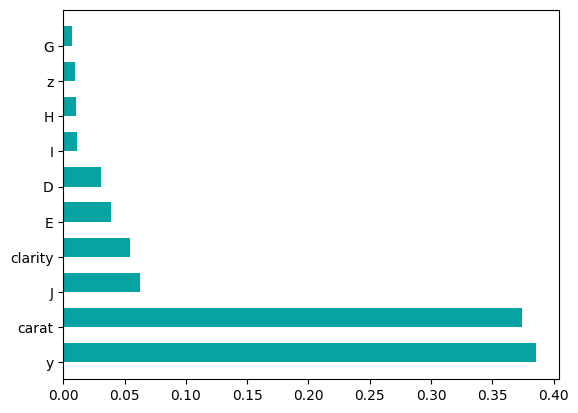

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_xgbm.feature[:10],
        feature_importances_xgbm.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

In [ ]:
joblib.dump(xgbm_rs, "xgbm_model.pkl")

['xgbm_model.pkl']

# **Test data submission**

**Test data preperation:**

In [ ]:
test_data = pd.read_csv("/content/test.csv")
test_data.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [ ]:
# adding size feature and removing x, y, z columns
test_data['size'] = test_data.x * test_data.y * test_data.z
test_data.drop(['x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
# feature transformation like we did with training data
test_data[['cut']] = test_data[['cut']].apply(lr1_cut.transform)
test_data[['clarity']] = test_data[['clarity']].apply(lr1_clarity.transform)

test_data_prepared = full_pipeline.transform(test_data)

In [ ]:
df_col_names = ['carat', 'cut','clarity', 'depth', 'table','size', 'D', 'E', 'F', 'G', 'H', 'I', 'J' ]
test_data_prepared = pd.DataFrame(test_data_prepared, columns=df_col_names)
test_data_prepared.head()

,carat,cut,clarity,depth,table,size,D,E,F,G,H,I,J
0,-0.980670,-0.605281,1.829142,-0.505137,-0.179971,-0.983973,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.159068,0.406992,0.666720,0.754194,0.295144,-0.145378,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.758615,1.419266,0.085509,0.832902,-0.655085,-0.761339,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.062986,0.406992,-0.495702,-1.292219,0.770259,0.092577,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.847437,-0.605281,1.247931,-0.426429,-0.655085,-0.836276,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**price prediction**

predicting using the best models

In [ ]:
# test_predicted = lgbm_best.predict(test_data_prepared)
# test_predicted = xgbm.predict(test_data_prepared)
# test_predicted = mlp_model.predict(test_data_prepared)
# test_predicted = logistic_model.predict(test_data_prepared)
# test_predicted = lgbm_rs.predict(test_data_prepared)
# test_predicted = xgbm_rs.predict(test_data_prepared)
test_predicted = rf_rs.predict(test_data_prepared)
# test_predicted = lgbm_model.predict(test_data_prepared)

In [ ]:
# the predicted values are float, but price has to be integer value so we need to transform the results.
sub = {'Id': test_data.Id, 'price': test_predicted}
submission = pd.DataFrame(sub)
submission.head()

,Id,price
0,1,800.362083
1,2,2956.868750
2,3,970.230042
3,4,2746.160000
4,5,1096.537500


In [ ]:
integers = lambda x: int(x)
submission.price = submission.price.map(integers)

In [ ]:
submission.to_csv('submission_rf7.csv', index=False)